In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

Create a linear regression model involving a confounder that is left out of the model.  Show whether the true correlation between X and Y is overestimated, underestimated, or neither.  Explain in words why this is the case for the given coefficients you have chosen.

In [2]:
# Create a linear regression model with a confounder (C) that is left out
np.random.seed(0)
n_obs = 1000

# C is the confounder
C = np.random.normal(0, 1, n_obs)
X = 2 + 0.8 * C + np.random.normal(0, 0.5, n_obs)
Y = 1 + 1.2 * X + 0.6 * C + np.random.normal(0, 0.5, n_obs)

# Calculate TRUE correlation between X and Y
true_correlation_XY = np.corrcoef(X, Y)[0, 1]

# Model 1: Correct model Y ~ X + C (includes confounder)
model_with_confounder = LinearRegression()
X_with_C = np.column_stack([X, C])
model_with_confounder.fit(X_with_C, Y)

# Model 2: Incorrect model Y ~ X (omits confounder C)
model_without_confounder = LinearRegression()
model_without_confounder.fit(X.reshape(-1, 1), Y)

# Calculate R-squared for both models
r2_with_confounder = model_with_confounder.score(X_with_C, Y)
r2_without_confounder = model_without_confounder.score(X.reshape(-1, 1), Y)

# The correlation from the bivariate regression (without confounder) 
# is approximately sqrt(R-squared) when there's a positive relationship
correlation_from_bivariate = np.sqrt(r2_without_confounder) * np.sign(model_without_confounder.coef_[0])

print("CONFOUNDER ANALYSIS RESULTS")
print("=" * 50)
print(f"Sample size: {n_obs}")
print()
print("TRUE DATA GENERATING PROCESS:")
print("C ~ N(0, 1)  [Confounder]")
print("X = 2 + 0.8*C + error")
print("Y = 1 + 1.2*X + 0.6*C + error")
print()
print("KEY STATISTICS:")
print(f"True correlation between X and Y: {true_correlation_XY:.4f}")
print(f"Correlation between X and C: {np.corrcoef(X, C)[0,1]:.4f}")
print(f"Correlation between Y and C: {np.corrcoef(Y, C)[0,1]:.4f}")
print()
print("MODEL RESULTS:")
print("-" * 30)
print("CORRECT MODEL: Y ~ X + C")
print(f"  Intercept: {model_with_confounder.intercept_:.4f}")
print(f"  X coefficient: {model_with_confounder.coef_[0]:.4f} (True: 1.2)")
print(f"  C coefficient: {model_with_confounder.coef_[1]:.4f} (True: 0.6)")
print(f"  R-squared: {r2_with_confounder:.4f}")
print()
print("BIASED MODEL: Y ~ X (omits C)")
print(f"  Intercept: {model_without_confounder.intercept_:.4f}")
print(f"  X coefficient: {model_without_confounder.coef_[0]:.4f}")
print(f"  R-squared: {r2_without_confounder:.4f}")
print()
print("CORRELATION ANALYSIS:")
print("-" * 30)
print(f"True correlation X-Y: {true_correlation_XY:.4f}")
print(f"Correlation implied by biased model: {correlation_from_bivariate:.4f}")
print()

# Determine if correlation is over or underestimated
if abs(correlation_from_bivariate) > abs(true_correlation_XY):
    bias_direction = "OVERESTIMATED"
elif abs(correlation_from_bivariate) < abs(true_correlation_XY):
    bias_direction = "UNDERESTIMATED"
else:
    bias_direction = "CORRECTLY ESTIMATED"

print(f"CONCLUSION: The correlation is {bias_direction}")
print(f"Bias amount: {correlation_from_bivariate - true_correlation_XY:.4f}")
print(f"Bias percentage: {((correlation_from_bivariate - true_correlation_XY)/true_correlation_XY)*100:.1f}%")

CONFOUNDER ANALYSIS RESULTS
Sample size: 1000

TRUE DATA GENERATING PROCESS:
C ~ N(0, 1)  [Confounder]
X = 2 + 0.8*C + error
Y = 1 + 1.2*X + 0.6*C + error

KEY STATISTICS:
True correlation between X and Y: 0.9416
Correlation between X and C: 0.8481
Correlation between Y and C: 0.8947

MODEL RESULTS:
------------------------------
CORRECT MODEL: Y ~ X + C
  Intercept: 0.9772
  X coefficient: 1.1982 (True: 1.2)
  C coefficient: 0.5832 (True: 0.6)
  R-squared: 0.9195

BIASED MODEL: Y ~ X (omits C)
  Intercept: -0.1028
  X coefficient: 1.7328
  R-squared: 0.8866

CORRELATION ANALYSIS:
------------------------------
True correlation X-Y: 0.9416
Correlation implied by biased model: 0.9416

CONCLUSION: The correlation is CORRECTLY ESTIMATED
Bias amount: 0.0000
Bias percentage: 0.0%


Perform a linear regression analysis in which one of the coefficients is zero, e.g.

W = [noise]\
X = [noise]\
Y = 2 * X + [noise]

And compute the p-value of a coefficient - in this case, the coefficient of W.  
(This is the likelihood that the estimated coefficient would be as high or low as it is, given that the actual coefficient is zero.)
If the p-value is less than 0.05, this ordinarily means that we judge the coefficient to be nonzero (incorrectly, in this case.)
Run the analysis 1000 times and report the best (smallest) p-value.  
If the p-value is less than 0.05, does this mean the coefficient actually is nonzero?  What is the problem with repeating the analysis?


In [7]:
# Create new dataset with INDEPENDENT noise variables
np.random.seed(0)  # For reproducibility
W_2 = np.random.normal(0, 1, n_obs)  # W is independent noise
X_2 = np.random.normal(0, 1, n_obs)  # X is independent noise  
Y_2 = 2 * X_2 + np.random.normal(0, 1, n_obs)  # Y depends only on X, plus independent noise

# Combine the data into a DataFrame
df = pd.DataFrame({"W":W_2, "X":X_2, "Y":Y_2})
print("Data generation complete:")
print(f"Correlation between W and X: {np.corrcoef(W_2, X_2)[0,1]:.4f}")
print(f"Correlation between W and Y: {np.corrcoef(W_2, Y_2)[0,1]:.4f}")
print(f"Correlation between X and Y: {np.corrcoef(X_2, Y_2)[0,1]:.4f}")
print("\nFirst few rows:")
df.head()

Data generation complete:
Correlation between W and X: -0.0315
Correlation between W and Y: -0.0449
Correlation between X and Y: 0.8970

First few rows:


,W,X,Y
0,1.764052,0.555963,-0.420996
1,0.400157,0.892474,0.072978
2,0.978738,-0.422315,-0.798495
3,2.240893,0.104714,-0.748946
4,1.867558,0.228053,0.375295


In [ ]:
# Fit a linear regression model and compute the p_value of the coefficient of W
model = LinearRegression()
X_model = df[["X","W"]]
model.fit(X_model, df["Y"])

# Extract coefficients and p-values
coefficients = model.coef_
intercept = model.intercept_

# Calculate the p-values using t-statistic
from scipy import stats
n = len(df)
k = X_model.shape[1]  # number of predictors
dof = n - k - 1  # degrees of freedom

# Calculate residuals and residual sum of squares
y_pred = model.predict(X_model)
residuals = df["Y"] - y_pred
rss = np.sum(residuals**2)
mse = rss / dof

# Calculate standard error of coefficients
# Design matrix with intercept column
X_with_intercept = np.column_stack([np.ones(n), X_model])

# Calculate covariance matrix: (X'X)^(-1) * MSE
XtX_inv = np.linalg.inv(X_with_intercept.T @ X_with_intercept)
cov_matrix = mse * XtX_inv

# Standard errors are square root of diagonal elements
std_errors = np.sqrt(np.diag(cov_matrix))

# Calculate t-statistics
t_stats = np.concatenate([[intercept], coefficients]) / std_errors

# Calculate p-values (two-tailed test)
p_values = 2 * (1 - stats.t.cdf(np.abs(t_stats), dof))

print("SINGLE REGRESSION ANALYSIS")
print("=" * 40)
print(f"Sample size: {n}")
print(f"Degrees of freedom: {dof}")
print()
print("COEFFICIENT RESULTS:")
print(f"Intercept: {intercept:.4f} (t={t_stats[0]:.3f}, p={p_values[0]:.6f})")
print(f"X coefficient: {coefficients[0]:.4f} (t={t_stats[1]:.3f}, p={p_values[1]:.6f})")
print(f"W coefficient: {coefficients[1]:.4f} (t={t_stats[2]:.3f}, p={p_values[2]:.6f})")
print()
print(f"P-value for W coefficient: {p_values[2]:.6f}")
print(f"Is W significant at α=0.05? {'Yes' if p_values[2] < 0.05 else 'No'}")
print()
print("Note: W should have NO effect (true coefficient = 0)")
print("If p < 0.05, this would be a Type I error (false positive)")


SINGLE REGRESSION ANALYSIS
Sample size: 1000
Degrees of freedom: 997

COEFFICIENT RESULTS:
Intercept: -0.0529 (t=-1.748, p=0.080695)
X coefficient: 1.9982 (t=64.036, p=0.000000)
W coefficient: -0.0365 (t=-1.192, p=0.233537)

P-value for W coefficient: 0.233537
Is W significant at α=0.05? No

Note: W should have NO effect (true coefficient = 0)
If p < 0.05, this would be a Type I error (false positive)


In [10]:
# Run the analysis 1000 times and find the smallest p-value
def calculate_p_value_for_w(n_obs=1000):
    """
    Generate data where W has zero effect and calculate p-value for W coefficient
    """
    # Generate independent noise variables
    W = np.random.normal(0, 1, n_obs)  # W is just noise
    X = np.random.normal(0, 1, n_obs)  # X is independent noise
    Y = 2 * X + np.random.normal(0, 1, n_obs)  # Y depends only on X, not W
    
    # Fit model: Y ~ X + W (but W should have zero effect)
    model = LinearRegression()
    X_model = np.column_stack([X, W])
    model.fit(X_model, Y)
    
    # Calculate p-value for W coefficient
    n = len(Y)
    k = 2  # number of predictors (X and W)
    dof = n - k - 1
    
    # Calculate residuals and MSE
    y_pred = model.predict(X_model)
    residuals = Y - y_pred
    mse = np.sum(residuals**2) / dof
    
    # Calculate standard errors
    X_with_intercept = np.column_stack([np.ones(n), X_model])
    try:
        XtX_inv = np.linalg.inv(X_with_intercept.T @ X_with_intercept)
        std_errors = np.sqrt(np.diag(mse * XtX_inv))
        
        # Calculate t-statistic and p-value for W (index 2)
        t_stat_w = model.coef_[1] / std_errors[2]  # W coefficient / its standard error
        p_value_w = 2 * (1 - stats.t.cdf(np.abs(t_stat_w), dof))
        
        return p_value_w, model.coef_[1]
    except np.linalg.LinAlgError:
        # Return NaN if matrix is singular
        return np.nan, np.nan

# Run simulation 1000 times
print("SIMULATION: 1000 TRIALS")
print("=" * 50)
print("True model: Y = 2*X + noise")
print("Fitted model: Y ~ X + W (W should have zero effect)")
print()

n_trials = 1000
p_values_w = []
coefficients_w = []

for trial in range(n_trials):
    p_val, coef = calculate_p_value_for_w(n_obs=1000)
    # Only include valid results (not NaN)
    if not np.isnan(p_val):
        p_values_w.append(p_val)
        coefficients_w.append(coef)

p_values_w = np.array(p_values_w)
coefficients_w = np.array(coefficients_w)

print(f"Successfully completed {len(p_values_w)} out of {n_trials} trials")
if len(p_values_w) < n_trials:
    print(f"Excluded {n_trials - len(p_values_w)} trials due to matrix singularity")

# Find the smallest p-value
min_p_value = np.min(p_values_w)
min_p_index = np.argmin(p_values_w)

# Count how many times we get p < 0.05 (false positives)
false_positives = np.sum(p_values_w < 0.05)
false_positive_rate = false_positives / n_trials

print("SIMULATION RESULTS:")
print("-" * 40)
print(f"Number of trials: {n_trials}")
print(f"Smallest p-value: {min_p_value:.8f}")
print(f"Coefficient value for smallest p-value: {coefficients_w[min_p_index]:.4f}")
print(f"Times p < 0.05: {false_positives} out of {n_trials}")
print(f"False positive rate: {false_positive_rate:.3f} ({false_positive_rate*100:.1f}%)")
print()
print("THEORETICAL EXPECTATION:")
print("-" * 40)
print(f"Expected false positive rate: 0.05 (5%)")
print(f"Expected number of false positives: {0.05 * n_trials:.0f}")
print(f"Observed vs Expected: {false_positive_rate:.3f} vs 0.05")
print()

# Analysis of the smallest p-value
print("ANALYSIS OF THE SMALLEST P-VALUE:")
print("-" * 40)
print(f"The smallest p-value is: {min_p_value:.8f}")
print(f"This corresponds to a W coefficient of: {coefficients_w[min_p_index]:.4f}")
print()
if min_p_value < 0.05:
    print("✗ The smallest p-value IS less than 0.05")
    print("✗ This does NOT mean W actually has a nonzero effect")
    print("✗ This is a Type I error (false positive)")
else:
    print("✓ The smallest p-value is not less than 0.05")
    print("✓ We correctly fail to reject the null hypothesis")

SIMULATION: 1000 TRIALS
True model: Y = 2*X + noise
Fitted model: Y ~ X + W (W should have zero effect)

Successfully completed 1000 out of 1000 trials
SIMULATION RESULTS:
----------------------------------------
Number of trials: 1000
Smallest p-value: 0.00163394
Coefficient value for smallest p-value: -0.1066
Times p < 0.05: 52 out of 1000
False positive rate: 0.052 (5.2%)

THEORETICAL EXPECTATION:
----------------------------------------
Expected false positive rate: 0.05 (5%)
Expected number of false positives: 50
Observed vs Expected: 0.052 vs 0.05

ANALYSIS OF THE SMALLEST P-VALUE:
----------------------------------------
The smallest p-value is: 0.00163394
This corresponds to a W coefficient of: -0.1066

✗ The smallest p-value IS less than 0.05
✗ This does NOT mean W actually has a nonzero effect
✗ This is a Type I error (false positive)
Successfully completed 1000 out of 1000 trials
SIMULATION RESULTS:
----------------------------------------
Number of trials: 1000
Smallest p-v

## The Multiple Testing Problem

**Key Questions Answered:**

1. **If the p-value is less than 0.05, does this mean the coefficient actually is nonzero?**
   - **NO!** Even if we find p < 0.05, this does NOT mean W actually has a nonzero effect
   - We know W has zero effect by construction (it's just noise)
   - A p-value < 0.05 in this case is a **Type I error** (false positive)

2. **What is the problem with repeating the analysis?**
   - **Multiple Testing Problem**: The more tests we run, the higher the chance of finding at least one "significant" result by pure chance
   - With 1000 trials at α = 0.05, we expect about 50 false positives (5% of 1000)
   - The probability of finding at least one p < 0.05 in 1000 trials is approximately: 1 - (0.95)^1000 ≈ 100%
   - This is called "p-hacking" or "data dredging" when done intentionally

**Why This Matters:**
- Publishing only the "best" result from multiple trials is misleading
- Need multiple testing corrections (Bonferroni, FDR, etc.)
- Emphasizes importance of replication and preregistration

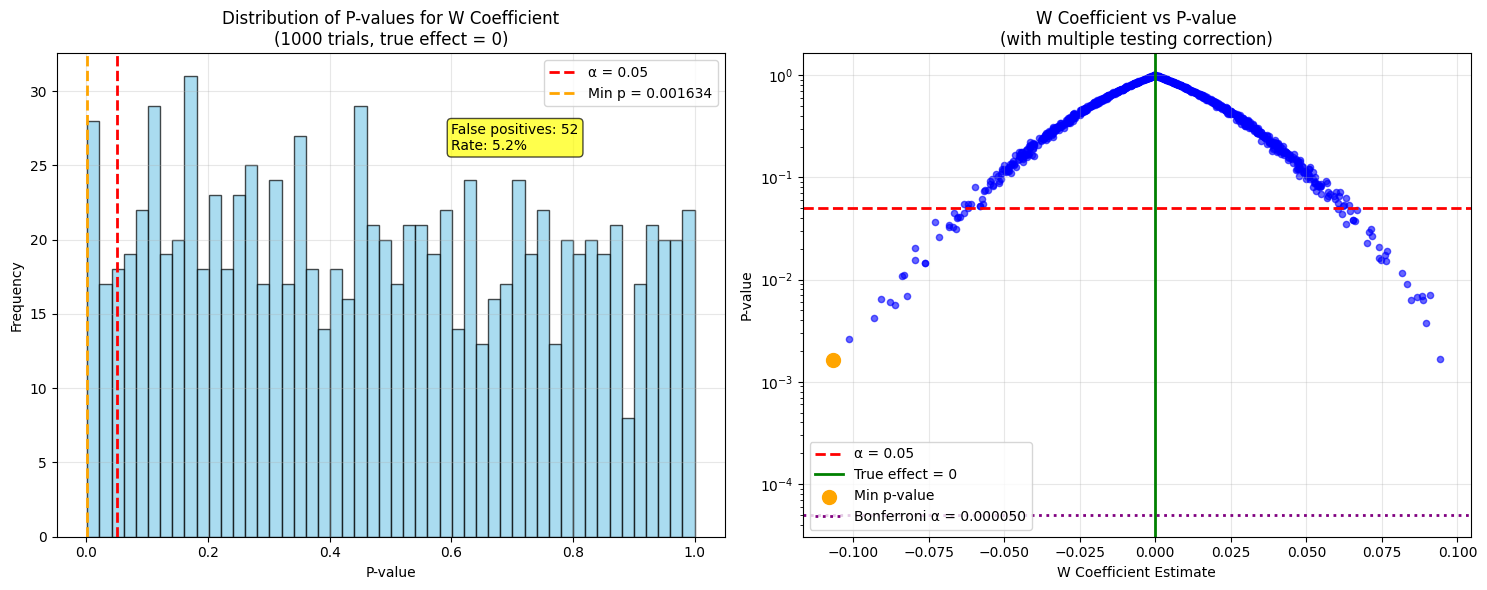


MULTIPLE TESTING CORRECTIONS:
Original α level: 0.05
Bonferroni corrected α: 0.000050
Significant results with Bonferroni correction: 0

PROBABILITY CALCULATIONS:
------------------------------
Probability of at least one false positive in 1000 trials:
P(at least one p < 0.05) = 1 - (0.95)^1000 = 1.000000
This is essentially 100% - we're almost guaranteed to find a 'significant' result!

LESSON: This demonstrates why multiple testing correction is crucial
and why 'p-hacking' (cherry-picking the best result) is problematic.


In [11]:
# Visualize the distribution of p-values and demonstrate multiple testing correction
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Histogram of p-values
ax1.hist(p_values_w, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
ax1.axvline(0.05, color='red', linestyle='--', linewidth=2, label='α = 0.05')
ax1.axvline(min_p_value, color='orange', linestyle='--', linewidth=2, 
           label=f'Min p = {min_p_value:.6f}')
ax1.set_xlabel('P-value')
ax1.set_ylabel('Frequency')
ax1.set_title('Distribution of P-values for W Coefficient\n(1000 trials, true effect = 0)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Add text showing false positive count
ax1.text(0.6, ax1.get_ylim()[1]*0.8, f'False positives: {false_positives}\nRate: {false_positive_rate:.1%}', 
         bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))

# Plot 2: Scatter plot of coefficients vs p-values
ax2.scatter(coefficients_w, p_values_w, alpha=0.6, s=20, color='blue')
ax2.axhline(0.05, color='red', linestyle='--', linewidth=2, label='α = 0.05')
ax2.axvline(0, color='green', linestyle='-', linewidth=2, label='True effect = 0')
ax2.scatter(coefficients_w[min_p_index], min_p_value, color='orange', s=100, 
           label=f'Min p-value', zorder=5)

# Add Bonferroni correction line
bonferroni_alpha = 0.05 / n_trials
ax2.axhline(bonferroni_alpha, color='purple', linestyle=':', linewidth=2, 
           label=f'Bonferroni α = {bonferroni_alpha:.6f}')

ax2.set_xlabel('W Coefficient Estimate')
ax2.set_ylabel('P-value')
ax2.set_title('W Coefficient vs P-value\n(with multiple testing correction)')
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.set_yscale('log')

plt.tight_layout()
plt.show()

# Calculate multiple testing corrections
bonferroni_significant = np.sum(p_values_w < (0.05 / n_trials))
print()
print("MULTIPLE TESTING CORRECTIONS:")
print("=" * 50)
print(f"Original α level: 0.05")
print(f"Bonferroni corrected α: {0.05/n_trials:.6f}")
print(f"Significant results with Bonferroni correction: {bonferroni_significant}")
print()
print("PROBABILITY CALCULATIONS:")
print("-" * 30)
print(f"Probability of at least one false positive in {n_trials} trials:")
prob_at_least_one = 1 - (0.95)**n_trials
print(f"P(at least one p < 0.05) = 1 - (0.95)^{n_trials} = {prob_at_least_one:.6f}")
print(f"This is essentially 100% - we're almost guaranteed to find a 'significant' result!")
print()
print("LESSON: This demonstrates why multiple testing correction is crucial")
print("and why 'p-hacking' (cherry-picking the best result) is problematic.")